In [1]:
import pandas as pd
df = pd.read_csv('data/Fish.csv')

In [2]:
perch_df = df.loc[df['Species'] == 'Perch']

perch_length = perch_df[['Length2']] # 2차원 데이터로 바꾸기
perch_weight = perch_df[['Weight']]
# perch_length

In [3]:
# k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 평균화함 따라서 새로운 샘플이 훈련 세트의 범위를 그 주변의 평균값으로만 예측해서 정확한 결과값이 나오지 않음

In [4]:
# 그렇기 때문에 선형회귀를 사용하여 기울기로 타깃이 훈련세트의 범위를 벗어나도 결과값을 예측하게 해야 함

In [5]:

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
train_test_split(perch_length, perch_weight)

In [6]:
#### 선형 회귀 (linear regression) : 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘 

In [7]:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

LinearRegression()

In [8]:

lr.score(test_input, test_target)

0.9078121771015141

In [9]:

lr.predict([[50]])

C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1182.65945833]])

In [10]:
# y(농어의 무게) = a * x(농어의 길이) + b 의 그래프
# a 와 b는 coef_ 와 inercept_에 저장되어있음

In [11]:
lr.coef_   # 기울기를 coefficient 또는 가중치 weight라고 부름 
# x 옆에 있는 상수값

array([[36.3806117]])

In [12]:
# 방정식 맨 뒤에 있는 상수 값 
lr.intercept_

array([-636.37112676])

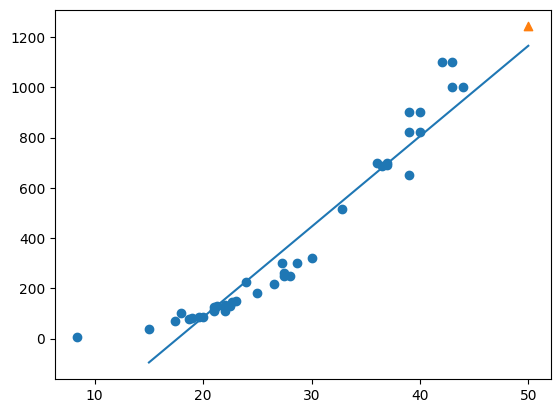

In [13]:
# 농어의 길이 15에서 50까지 직선으로 그려보기
# 앞에서 구한 기울기와 절편을 사용하여 두 점을 이어서 그리면 
import matplotlib.pyplot as plt
# 15 와 50은 농어의 길이로 x의 값
# 36은 lr.coef_의 값으로 x의 옆에있는 상수값
# 635는 lr.intercept_로 방적식 맨 뒤에 있는 상수값
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15 * 36 - 635 , 50 * 36 - 635]) 
plt.scatter(50, 1241.8, marker = '^') # 길이가 50cm인 농어의 데이터

In [14]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9225578981519545
0.9078121771015141


In [15]:
# 만약 이 직선으로 보면 농어의 무게가 마이너스가 나오는 문제가 발생함

In [16]:
lr.predict([[5]]) # 무게가 (-) 가 나오는 문제가 발생함 그래프로 그리면 

C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-454.46806826]])

#### 다항 회귀
    - 최적의 곡선을 찾기 
    - y = a * x **2 이렇게 제곱의 형태로 
    - 다항식이므로 다항식을 사용한 선형 회귀를 다항 회귀라고 부름

In [17]:
# x ** 2을 만들기 위해 길이에 ** 2 를 해서 새로운 변수에 저장함
# x ** 2의 값
train_input['Length2_poly'] = train_input[['Length2']] ** 2
test_input['Length2_poly'] = test_input[['Length2']] ** 2
train_input

,Length2,Length2_poly
85,21.3,453.69
108,30.0,900.00
117,39.0,1521.00
122,40.0,1600.00
76,17.4,302.76
127,44.0,1936.00
103,27.5,756.25
79,19.0,361.00
93,22.7,515.29
83,21.0,441.00


In [18]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [19]:
lr.score(test_input, test_target)

0.9455922379815709

In [20]:
lr.predict([[5, 25]]) # 데이터가 두개가 돼서 두개를 5cm 와 제곱인 25cm를 넣어줘야 함
# 결과가 아까는 음수가 나왔는데 지금은 양수가 나옴

C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[63.71361818]])

In [21]:
print(lr.coef_, lr.intercept_) # length2 = x의 상수값, length2 ** 2 = x**2의 상수값

[[-24.36677504   1.04627763]] [159.39055266]


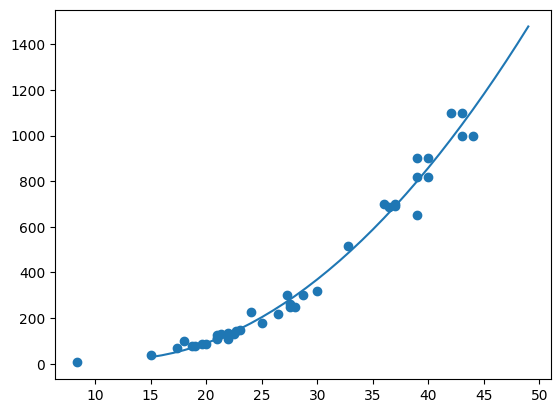

In [22]:
import numpy as np

point = np.arange(15, 50) # 구간별 직선을 그리기 위해 15에서 49까지의 정수 배열을 만듦
# train_input
plt.scatter(train_input['Length2'], train_target) # 훈련세트의 산점도

plt.plot(point, (float(lr.coef_[0][1]) * point ** 2) + (float(lr.coef_[0][0]) * point) + float(lr.intercept_[0]))
# 15에서 49까지 2차 방정식
# lr.coef_ 의 첫번째 리스트에서 2번째는 length **2의 항임
# 15에서 50까지의 농어의 길이에서 무게를 예측하기 
# 15 와 50은 x의 값
# lr.coef_의 두번째(length ** 2 )은 x ** 2의 상수값 
# lr.coef_ 의 첫번째 값은(length)은 x의 상수값
# lr.intercept_의 값은 맨 뒤 상수값


In [23]:

print(lr.predict([[1, 1]])) # 농어의 길이, 농어의 길이를 제곱한것
print(lr.predict([[3, 9]]))

[[136.07005524]]
[[95.70672619]]


C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
